### Apply two clustering algorithms on a selected dataset

**K-Means Clustering**



```
# Libraries Import
```



In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
import os
os.environ["OMP_NUM_THREADS"]="1"



```
# Dataset Import
```



In [48]:
ds = pd.read_csv("bed-nets-and-illness-by-county-csv-1.csv")



```
# Exploring dF
```



In [49]:
ds.tail()

,objectid,name_of_county,percentagethat_slept_under_a_be,percentage_that_had_a_fever_or_,heath_spending_per_person
42,43,TURKANA,6.0,55.4,14
43,44,UASIN-GISHU,33.6,43.4,13
44,45,VIHIGA,28.5,33.4,10
45,46,WAJIR,18.3,54.8,21
46,47,WEST POKOT,15.9,60.4,24


In [50]:
ds.head()

,objectid,name_of_county,percentagethat_slept_under_a_be,percentage_that_had_a_fever_or_,heath_spending_per_person
0,1,BARINGO,24.2,14.9,29
1,2,BOMET,26.3,39.5,20
2,3,BUNGOMA,27.8,37.6,20
3,4,BUSIA,40.7,42.8,20
4,5,EMBU,7.5,9.4,48


In [51]:
ds.describe()

,objectid,percentagethat_slept_under_a_be,percentage_that_had_a_fever_or_,heath_spending_per_person
count,47.000000,47.000000,47.000000,47.000000
mean,24.000000,26.729787,40.180851,24.042553
std,13.711309,14.801174,15.168154,11.500392
min,1.000000,1.700000,0.000000,7.000000
25%,12.500000,12.950000,35.000000,16.500000
50%,24.000000,27.800000,42.600000,22.000000
75%,35.500000,38.450000,50.700000,29.000000
max,47.000000,62.400000,63.300000,50.000000


In [52]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   objectid                         47 non-null     int64  
 1   name_of_county                   47 non-null     object 
 2   percentagethat_slept_under_a_be  47 non-null     float64
 3   percentage_that_had_a_fever_or_  47 non-null     float64
 4   heath_spending_per_person        47 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [53]:
ds.tail()

,objectid,name_of_county,percentagethat_slept_under_a_be,percentage_that_had_a_fever_or_,heath_spending_per_person
42,43,TURKANA,6.0,55.4,14
43,44,UASIN-GISHU,33.6,43.4,13
44,45,VIHIGA,28.5,33.4,10
45,46,WAJIR,18.3,54.8,21
46,47,WEST POKOT,15.9,60.4,24


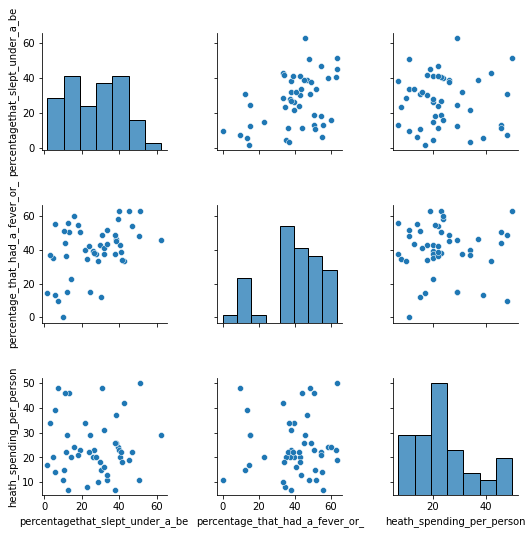

In [54]:
sns.pairplot(ds.iloc[:,[2,3,4]])



```
# Scaling the Dataset
```



In [55]:
from sklearn.preprocessing import StandardScaler
X = ds.iloc[:,[2,3,4]].values
sc_X = StandardScaler()
x = sc_X.fit_transform(X)



```
# Finding the optimal number of clusters using the elbow method
```



<function matplotlib.pyplot.show(*args, **kw)>

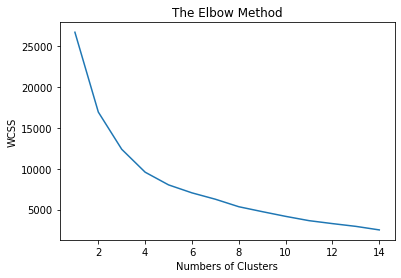

In [56]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show



```
# Fitting K-Means to the Dataset
```



In [77]:
kmeans = KMeans(n_clusters = 4,init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(X)



```
# Visualising the Clusters
```



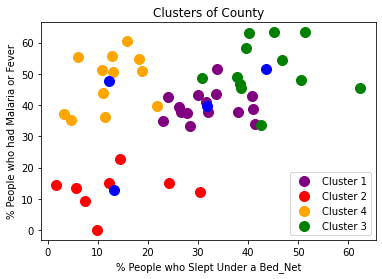

In [83]:
plt.figsize=(10,10)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=100,c="purple",label="Cluster 1")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=100,c="red",label="Cluster 2")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=100,c="orange",label="Cluster 4")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=100,c="green",label="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="blue")
plt.xlabel("% People who Slept Under a Bed_Net")
plt.ylabel("% People who had Malaria or Fever")
plt.title("Clusters of County")
style = "true_label"
plt.legend()
plt.show()

**Heirarchical Clustering**



```
# Using a Dendrogram to find the optimal numbers of Clusters
```



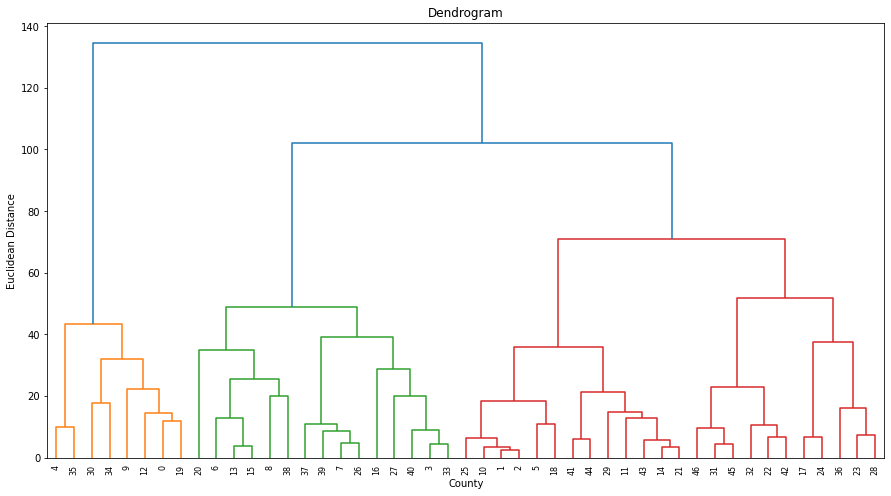

In [84]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendrogram")
plt.xlabel("County")
plt.ylabel("Euclidean Distance")
plt.show()

If you draw a horizontal line across the dendrogram, the number of vertical lines crossing the line equates to the number of clusters. For example, from the below we could end the clustering process at the point where the Euclidean distance is 12 and this would give us three clusters (one formed of the orange data points, one formed of the green data points, and one formed of the red data points shown on the dendrogram). However, typically we take a horizontal line around halfway down the dendrogram to identify the optimal number of clusters, which in this case gives me four



```
# Fitting the Heirarchical Clustering to the Dataset
```



In [60]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(X)



```
# Visualising the Cluster
```



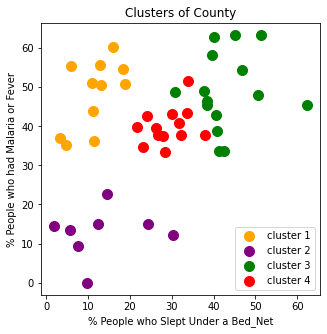

In [79]:
plt.figure(figsize=(5,5))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c="orange",label="cluster 1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c="purple",label="cluster 2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c="green",label="cluster 3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c="red",label="cluster 4")
plt.title("Clusters of County")
plt.xlabel("% People who Slept Under a Bed_Net")
plt.ylabel("% People who had Malaria or Fever")
plt.legend()
plt.show()

**DBSCAN**

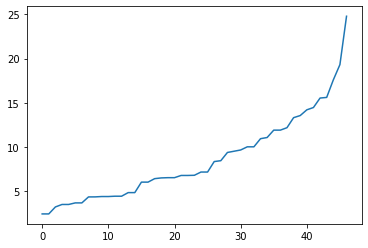

In [73]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=3)
distances,indices=neighbours.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances,axis=0)
plt.plot(distances)

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=15,min_samples=5)
y_dbscan = dbscan.fit_predict(X)



```
# Inspect the array to identify number of Clusters
```



In [75]:
y_dbscan

array([-1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])



```
# Visualising the Clusters
```



With DBSCAN, there's no predefined number of clusters. To see how many clusters have been generated, inspect the array of cluster assignments. 

(Values of -1 indicate those points which haven’t been assigned a cluster as they are considered noise.)

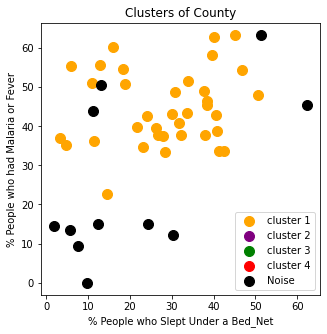

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(X[y_dbscan==0,0],X[y_dbscan==0,1],s=100,c="orange",label="cluster 1")
plt.scatter(X[y_dbscan==1,0],X[y_dbscan==1,1],s=100,c="purple",label="cluster 2")
plt.scatter(X[y_dbscan==2,0],X[y_dbscan==2,1],s=100,c="green",label="cluster 3")
plt.scatter(X[y_dbscan==3,0],X[y_dbscan==3,1],s=100,c="red",label="cluster 4")
plt.scatter(X[y_dbscan==-1,0],X[y_dbscan==-1,1],s=100,c="black",label="Noise")
plt.title("Clusters of County")
plt.xlabel("% People who Slept Under a Bed_Net")
plt.ylabel("% People who had Malaria or Fever")
plt.legend()
plt.show()

Due to the fact that DBSCAN is highly robust to noise (outliers) and inasmuch as it’s effective for clustering involving density-based metrics, it was not found to be particularly suitable for this dataset, because there weren’t just enough data points for the clustering method to be a density-based one.